###################################### Section 1 start ################################################################################
###################################### Packages, Functions,Hardcoded regions ##########################################################

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import re
import seaborn as sb
import io
import os
import pandas as pd
import fnmatch
from numpy import percentile

In [2]:
def read_txt2(path):
    df = pd.read_csv(path, header=None)
    lst=df[0].str.split('\t')
    # print(path)
    hold = [row[8] for row in lst]
    fhold= [float(element) for element in hold]
    xhold = [(row[1]) for row in lst]
    fxhold= [int(element) for element in xhold]
    refhold = [row[3] for row in lst]
    althold = [row[4] for row in lst]
    return fhold, fxhold, refhold, althold
def get_rRNA_bounds(gb_file_path):
    gb_file = open(gb_file_path)
    pattern_1 = r'^\s+rRNA'
    pattern_2 = r'\d+'
    points = []
    for line in gb_file:
        if re.search(pattern_1, line):
            send = re.findall(pattern_2, line)
            points.append([int(send[0]), int(send[1])])
    return points
def find_vcf_directories(root_dir):
    vcf_directories = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            # if filename.endswith('_rDNA.vcf'):
            if filename.endswith('_rDNA.vcf_temp7.txt'):
                vcf_directories.append(os.path.join(dirpath, filename))
    return vcf_directories

In [3]:
####################hard code or read in regional information that we know of########################################
########################################################################################################################
#28S ExpansionSegments
data = np.array([
    ['ESL5', 'ESL7', 'ESL9', 'ESL10', 'ESL12', 'ESL15', 'ESL19', 'ESL20', 'ESL24', 'ESL26', 'ESL27', 'ESL30', 'ESL31', 'ESL39', 'ESL41'],
    [114, 465, 1384, 1682, 1793, 2075, 2439, 2538, 2685, 2751, 2875, 3955, 4057, 4698, 4983],
    [156, 1265, 1487, 1711, 1829, 2256, 2494, 2575, 2705, 2764, 3586, 4013, 4124, 4905, 4996]
])
df1 = pd.DataFrame(data.T, columns=['Segment', 'Start', 'End'])
df1['Start'] = pd.to_numeric(df1['Start']) + 7935
df1['End'] = pd.to_numeric(df1['End']) + 7935

#18S ExpansionSegments
data = np.array([
    ['ESS1', 'ESS2', 'ESS3', 'ESS4', 'ESS6', 'ESS7', 'ESS8', 'ESS9', 'ESS10', 'ESS11', 'ESS12'],
    [53, 116, 208, 512, 737, 1097, 1272, 1398, 1533, 1563, 1726],
    [73, 130, 291, 583, 911, 1114, 1305, 1403, 1551, 1581, 1789]
])
df2 = pd.DataFrame(data.T, columns=['Segment', 'Start', 'End'])
df2['Start'] = pd.to_numeric(df2['Start']) + 3657
df2['End'] = pd.to_numeric(df2['End']) + 3657
#homopolymers
df3=pd.read_csv(r'/home/xm595/human/homopolymers.csv')

#rRNA regions(18S, 5.8S, 28S)
gb_file_path='/home/xm595/human/U13369.1_Human_rDNA_repeat_unit.gb'
rRNA_positions = get_rRNA_bounds(gb_file_path)
# zoomed_range = [rRNA_positions[0][0]-100,rRNA_positions[-1][-1]+100]
zoomed_range = [0,13314]

#conserved regions
df4=pd.read_csv(r'/home/xm595/human/Copy of conserve - Sheet1.csv')

#pseudogene regions
df6=pd.read_csv(r'/home/xm595/human/psedogene.csv')

In [4]:
root_directory2 = '/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP'
vcf_directories = find_vcf_directories(root_directory2)



In [5]:
expansion_positions1=[]
for row in df1.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    expansion_positions1.append(hold)
print(expansion_positions1)
expansion_positions2=[]
for row in df2.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    expansion_positions2.append(hold)
print(expansion_positions2)
hmplr_pos=[]
for row in df3.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    hmplr_pos.append(hold)
print(hmplr_pos)
csvd_pos=[]
for row in df4.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    csvd_pos.append(hold)
print(csvd_pos)
pseud_pos=[]
for row in df6.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    pseud_pos.append(hold)
print(pseud_pos)

[[8049, 8091], [8400, 9200], [9319, 9422], [9617, 9646], [9728, 9764], [10010, 10191], [10374, 10429], [10473, 10510], [10620, 10640], [10686, 10699], [10810, 11521], [11890, 11948], [11992, 12059], [12633, 12840], [12918, 12931]]
[[3710, 3730], [3773, 3787], [3865, 3948], [4169, 4240], [4394, 4568], [4754, 4771], [4929, 4962], [5055, 5060], [5190, 5208], [5220, 5238], [5383, 5446]]
[[8439, 8451], [8903, 8914], [9042, 9053], [10110, 10130], [10161, 10172], [10892, 10895], [10920, 10931], [11001, 11013], [11244, 11262], [11344, 11355], [11445, 11456], [12697, 12712], [3920, 3931], [8853, 8864], [9058, 9069], [9081, 9093], [11997, 12008]]
[[8256, 8267], [8284, 8292], [9234, 9256], [9439, 9445], [9454, 9461], [9483, 9491], [9511, 9525], [9547, 9584], [9589, 9607], [9654, 9661], [9663, 9671], [9698, 9715], [9698, 9715], [9772, 9779], [9784, 9792], [9795, 9801], [9810, 9815], [9882, 9888], [9890, 9897], [9899, 9909], [9912, 9948], [9952, 9975], [10266, 10277], [10278, 10295], [10327, 10334]

###################################### Section 1 end ######################################################################
###################################### Section 2.1 start ##################################################################
###################################### Allele Frequency Analysis ##########################################################

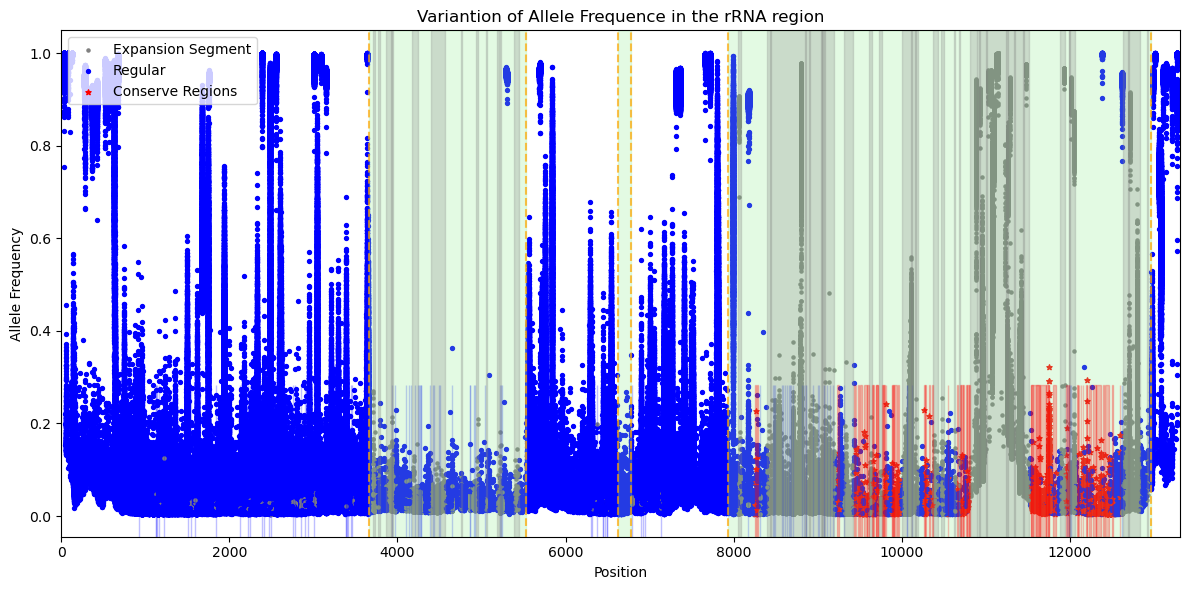

In [29]:
############overall vairant distribution of the entire cohort########################
plt.figure(figsize=(12, 6))
# plt.scatter(gx,gy, s=15, color='Gray')
# plt.scatter(sx,sy, s=15, color='Red',marker='*')
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    # print(file)
    greyx=[]
    greyy=[]
    starx=[]
    stary=[]
    # Convert xhold and hold to DataFrame for easier manipulation
    data = pd.DataFrame({'x': xhold, 'y': hold})
    # Loop through each segment in df1(28S)
    for _, segment in df1.iterrows():
        start, end = segment['Start'], segment['End']
        
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end)
        selected_data = data[mask]
        
        # Append selected x and y to greyx and greyy
        greyx.extend(selected_data['x'].tolist())
        greyy.extend(selected_data['y'].tolist())
        
        # Remove the selected rows from data
        data = data[~mask]
    # Loop through each segment in df2(18S)
    for _, segment in df2.iterrows():
        start, end = segment['Start'], segment['End']
        
        # Select rows where 'x' is within the segment range
        mask2 = (data['x'] >= start) & (data['x'] <= end)
        selected_data2 = data[mask2]
        
        # Append selected x and y to greyx and greyy
        greyx.extend(selected_data2['x'].tolist())
        greyy.extend(selected_data2['y'].tolist())
        
        # Remove the selected rows from data
        data = data[~mask2]
    # Loop through each segment in df3(homopolymers)
    for _, segment in df3.iterrows():
        start, end = segment['Start'], segment['End']
        
        # Select rows where 'x' is within the segment range
        mask3 = (data['x'] >= start) & (data['x'] <= end)
        selected_data3 = data[mask3]
        
        # Append selected x and y to greyx and greyy
        greyx.extend(selected_data3['x'].tolist())
        greyy.extend(selected_data3['y'].tolist())
        
        # Remove the selected rows from data
        data = data[~mask3]
    for _, segment in df6.iterrows():
        start, end = segment['Start'], segment['End']
        
        # Select rows where 'x' is within the segment range
        mask6 = (data['x'] >= start) & (data['x'] <= end)
        selected_data6 = data[mask6]
        
        # Append selected x and y to greyx and greyy
        greyx.extend(selected_data6['x'].tolist())
        greyy.extend(selected_data6['y'].tolist())
        
        # Remove the selected rows from data
        data = data[~mask6]

    # Loop through each segment in df4(conserved)
    for _, segment in df4.iterrows():
        start, end = segment['Start'], segment['End']
        
        # Select rows where 'x' is within the segment range
        mask4 = (data['x'] >= start) & (data['x'] <= end)
        selected_data4 = data[mask4]
        
        # Append selected x and y to greyx and greyy
        starx.extend(selected_data4['x'].tolist())
        stary.extend(selected_data4['y'].tolist())
        
        # Remove the selected rows from data
        data = data[~mask4]
    # Loop through each segment in df6(pseudo)

    xhold=data['x']
    hold=data['y']
    plt.scatter(greyx,greyy, s=5, color='Gray')
    plt.scatter(xhold,hold, s=8, color='Blue')
    plt.scatter(starx,stary, s=15, color='Red',marker='*')
    
for i, (start, end) in enumerate(pseud_pos):
    rRNA_region = plt.axvspan(start, end, 0, 0.3, alpha=0.25, color='blue')

for i, (start, end) in enumerate(rRNA_positions):

    plt.axvline(x=start, color='orange', linestyle='--', alpha=0.7)
    plt.axvline(x=end, color='orange', linestyle='--', alpha=0.7)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='lightgreen')
for i, (start, end) in enumerate(expansion_positions2):
    #print(row[1]['Start'])
#    plt.axvline(x=row[1]['Start'], color='grey', linestyle='--', alpha=0.1)
#    plt.axvline(x=row[1]['End'], color='grey', linestyle='--', alpha=0.1)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')
    
for i, (start, end) in enumerate(expansion_positions1):
#    plt.axvline(x=row[1]['Start'], color='grey', linestyle='--', alpha=0.1)
#    plt.axvline(x=row[1]['End'], color='grey', linestyle='--', alpha=0.1)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')

for i, (start, end) in enumerate(hmplr_pos):
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')

for i, (start, end) in enumerate(csvd_pos):
    rRNA_region = plt.axvspan(start, end, 0, 0.3, alpha=0.25, color='red')


plt.xlabel('Position')
plt.ylabel('Allele Frequency')
plt.title("Variantion of Allele Frequence in the rRNA region")
# plt.title("Homopolymer Removal")
plt.legend([ "Expansion Segment", "Regular", "Conserve Regions"], loc="upper left")
plt.xlim(zoomed_range)
plt.tight_layout()

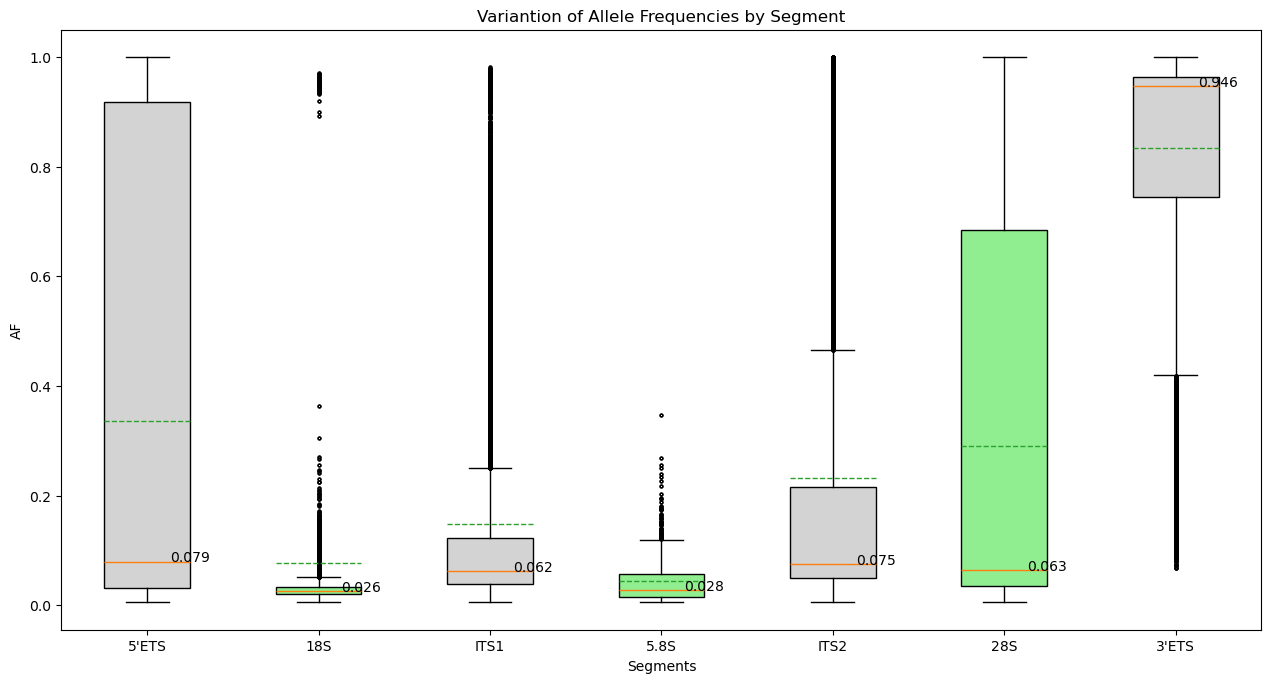

In [11]:
############ vairant distribution by segment########################
all_positions=[[1,3656,"5'ETS"],[3657, 5527,'18S'],[5528,6622,'ITS1'], [6623, 6779,'5.8S'], [6780,7934,'ITS2'],[7935, 12969,'28S'],[12970,13314,"3'ETS"]]
labels=["5'ETS", '18S', 'ITS1', '5.8S', 'ITS2', '28S', "3'ETS"]
ETS1x, ETS2x, ITS1x, ITS2x, etnSx, fivSx, ttySx, ETS1y, ETS2y, ITS1y, ITS2y, etnSy, fivSy, ttySy = [[] for _ in range(14)]
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    # Convert xhold and hold to DataFrame for easier manipulation
    data = pd.DataFrame({'x': xhold, 'y': hold})
    # Loop through each segment in df1(28S)
    for pair in all_positions:
        start, end, name = pair[0], pair[1], pair[2]
        # print(start, end, name)
        
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end)
        selected_data = data[mask]
        if name == "5'ETS" :
            ETS1x.extend(selected_data['x'].tolist())
            ETS1y.extend(selected_data['y'].tolist())
        if name == "18S" :
            etnSx.extend(selected_data['x'].tolist())
            etnSy.extend(selected_data['y'].tolist())
        if name == "ITS1" :
            ITS1x.extend(selected_data['x'].tolist())
            ITS1y.extend(selected_data['y'].tolist())
        if name == "5.8S" :
            fivSx.extend(selected_data['x'].tolist())
            fivSy.extend(selected_data['y'].tolist())
        if name == "ITS2" :
            ITS2x.extend(selected_data['x'].tolist())
            ITS2y.extend(selected_data['y'].tolist())
        if name == "28S" :
            ttySx.extend(selected_data['x'].tolist())
            ttySy.extend(selected_data['y'].tolist())
        if name == "3'ETS" :
            ETS2x.extend(selected_data['x'].tolist())
            ETS2y.extend(selected_data['y'].tolist())

for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    # Convert xhold and hold to DataFrame for easier manipulation
    data = pd.DataFrame({'x': xhold, 'y': hold})
    # Loop through each segment in df1(28S)
    for pair in all_positions:
        start, end, name = pair[0], pair[1], pair[2]
        # print(start, end, name)
        
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end)
        selected_data = data[mask]
        if name == "5'ETS" :
            ETS1x.extend(selected_data['x'].tolist())
            ETS1y.extend(selected_data['y'].tolist())
        if name == "18S" :
            etnSx.extend(selected_data['x'].tolist())
            etnSy.extend(selected_data['y'].tolist())
        if name == "ITS1" :
            ITS1x.extend(selected_data['x'].tolist())
            ITS1y.extend(selected_data['y'].tolist())
        if name == "5.8S" :
            fivSx.extend(selected_data['x'].tolist())
            fivSy.extend(selected_data['y'].tolist())
        if name == "ITS2" :
            ITS2x.extend(selected_data['x'].tolist())
            ITS2y.extend(selected_data['y'].tolist())
        if name == "28S" :
            ttySx.extend(selected_data['x'].tolist())
            ttySy.extend(selected_data['y'].tolist())
        if name == "3'ETS" :
            ETS2x.extend(selected_data['x'].tolist())
            ETS2y.extend(selected_data['y'].tolist())

# Create a sample DataFrame
# data = {'col1': [1, 5, 8, 3, 7, 2, 9, 4, 6],'col2': [1, 5, 8, 3, 7, 2, 9, 4, 6]}
data = [ETS1y, etnSy, ITS1y, fivSy, ITS2y, ttySy, ETS2y]

flierprops = {'marker': 'o', 'markersize': 2}
# Define boxplot colors
colors = ['lightgrey', 'lightgreen', 'lightgrey', 'lightgreen', 'lightgrey', 'lightgreen', 'lightgrey']  # Adjust color order as needed

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Add labels and title (optional)
bp = ax.boxplot(data, vert=True, patch_artist=True,labels=["5'ETS", '18S', 'ITS1', '5.8S', 'ITS2', '28S', "3'ETS"], flierprops=flierprops, showmeans=True,meanline=True)
#notch=True, vert=True,
# Color boxes and medians based on labels
for box, median, label in zip(bp['boxes'], bp['medians'], colors):
    box.set_facecolor(label)
    # median.set_color(label)

for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, '%.3f' % y,
         horizontalalignment='center') # draw above, centered

plt.xlabel("Segments")
plt.ylabel("AF")
plt.title("Variantion of Allele Frequencies by Segment")

# Display the plot
plt.show()



In [ ]:
###################################### Section 2.1 end ######################################################################
###################################### Section 2.2 start ##################################################################
###################################### Allele Percentage Analysis ##########################################################

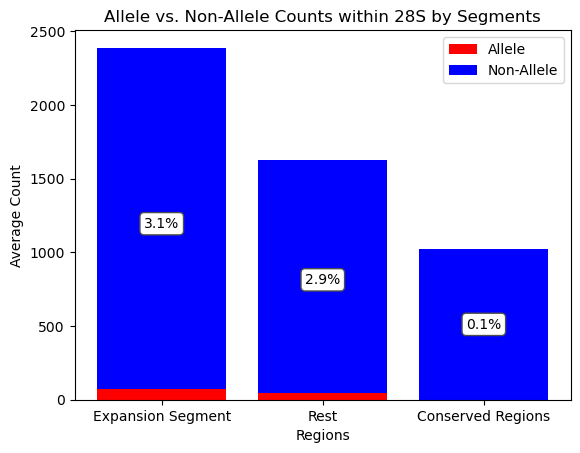

In [7]:
EXPt=0
for pair in exp_cor:
    huh=pair[1]-pair[0]+1
    EXPt=EXPt+huh
CSVt=0
for pair in csvd_pos:
    huh=pair[1]-pair[0]+1
    CSVt=CSVt+huh
RSTt=rRNA_positions[2][1]-rRNA_positions[2][0]+1-EXPt-CSVt

EXPc,CSVc,RSTc,EXPn,CSVn,RSTn=[0 for _ in range(6)]

for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    # Convert xhold and hold to DataFrame for easier manipulation
    data = pd.DataFrame({'x': xhold, 'y': hold})
    # Loop through each segment in df1(28S)
    huh=0
    for pair in exp_cor:
        start, end= pair[0], pair[1]
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end)
        selected_data = data[mask].drop_duplicates(subset='x', keep='first')
        EXPc=EXPc+len(selected_data)
        # EXPn=EXPn+EXPt-len(selected_data)
        huh=huh+len(selected_data)
        data = data[~mask]
    EXPn=EXPn+EXPt-huh
    huh=0    
    for pair in csvd_pos:
        start, end= pair[0], pair[1]
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end)
        selected_data = data[mask].drop_duplicates(subset='x', keep='first')
        CSVc=CSVc+len(selected_data)
        huh=huh+len(selected_data)
#        CSVn=CSVn+CSVt-len(selected_data)
        data = data[~mask]
    CSVn=CSVn+CSVt-huh
    huh2=0
    for pair in rRNA_positions:
        start, end= pair[0], pair[1]
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end)
        selected_data = data[mask].drop_duplicates(subset='x', keep='first')
        huh2=huh2+len(selected_data)
    RSTc=RSTc+huh2
    # print(len(data))
    RSTn=RSTn+RSTt-huh2

leg=['Expansion Segment', 'Rest', 'Conserved Regions']

y1=[EXPc/len(vcf_directories), RSTc/len(vcf_directories),CSVc/len(vcf_directories)]
y2=[EXPn/len(vcf_directories), RSTn/len(vcf_directories),CSVn/len(vcf_directories)]
# plot bars in stack manner
# Create the bar plot with stacked bars
plt.bar(leg, y1, color='r', label='Allele')
plt.bar(leg, y2, bottom=y1, color='b', label='Non-Allele')

# Add value labels using a loop for better control and customization
for i, (value1, value2) in enumerate(zip(y1, y2)):
    total_value = value1 + value2

    x_pos = leg[i]  # Center the label on the bar
    y_pos = (value1 + value2) / 2  # Place the label at the middle height

    pre=value1/total_value*100
    # Customize label format (optional)
    label_text = f"{pre:.1f}%"  # Format to one decimal place

    # Add the label with alignment and optional offset
    plt.text(x_pos, y_pos, label_text, ha='center', va='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

# Add legend and display the plot
plt.legend()
plt.xlabel('Regions')
plt.ylabel('Average Count')
plt.title('Allele vs. Non-Allele Counts within 28S by Segments')
plt.show()

In [16]:

all_positions=[[6623, 6779,'5.8S'], [12970,13314,"3'ETS"],[5528,6622,'ITS1'],[6780,7934,'ITS2'],[3657, 5527,'18S'],[1,3656,"5'ETS"],[7935, 12969,'28S']]
labels=['5.8S', "3'ETS",'ITS1','ITS2', '18S', "5'ETS",'28S']

clits=[[],[],[],[],[],[],[]]

for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    # Convert xhold and hold to DataFrame for easier manipulation
    data = pd.DataFrame({'x': xhold, 'y': hold})

    for i,pair in enumerate(all_positions):
        start, end= pair[0], pair[1]
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end)
        selected_data = data[mask].drop_duplicates(subset='x', keep='first')
        clits[i].append(len(selected_data))


pc=percentile(clits[0],[5, 50, 95])
pc=[]
for item in clits:
    ho=percentile(item,[5, 50, 95])
    pc.append(ho)
# print(pc)
pc=np.array(pc)
# Transpose the array
transposed_data = pc.T
transposed_data_copy1=transposed_data
for item in transposed_data_copy1:
    item[1]=None
    item[2]=None
    item[3]=None
    item[5]=None

phold1=transposed_data_copy1

pc=percentile(clits[0],[5, 50, 95])
pc=[]
for item in clits:
    ho=percentile(item,[5, 50, 95])
    pc.append(ho)

pc=np.array(pc)
# Transpose the array
transposed_data = pc.T
transposed_data_copy2=transposed_data
for item in transposed_data_copy2:
    item[0]=None
    item[4]=None
    item[6]=None

phold2=transposed_data_copy2


Text(0.5, 1.0, 'Number of Alleles within Each Segment by Length')

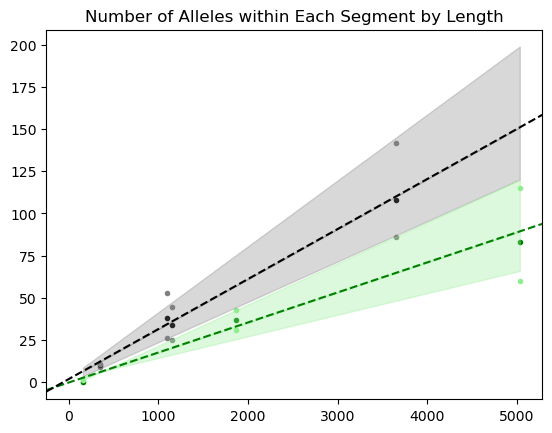

In [17]:

x=[345,1095,1155,3635]
y=[ 9, 26,  26,  87]
ymid=[ 10, 38,  35,  109]
yup=[ 11, 54,  45,  143]
m, b = np.polyfit(x, y, 1)
mmid, bmid = np.polyfit(x, ymid, 1)
mup, bup = np.polyfit(x, yup, 1)

x2=[157,1871,5035]
y2=[ 0, 31,  64]
ymid2=[ 0, 37,  88]
yup2=[ 1, 43,  120]
m2, b2 = np.polyfit(x2, y2, 1)
mmid2, bmid2 = np.polyfit(x2, ymid2, 1)
mup2, bup2 = np.polyfit(x2, yup2, 1)
# Create the x-axis values for plotting
x = range(7)  # Adjust the range based on your data


ttil=[157,345,1095,1155,1871,3656,5035]
x=ttil
# Calculate the y-values for each line
y1 = [m * i + b for i in x]
y2 = [mmid * i + bmid for i in x]
y3 = [mup * i + bup for i in x]

gy1 = [m2 * i + b2 for i in x]
gy2 = [mmid2 * i + bmid2 for i in x]
gy3 = [mup2 * i + bup2 for i in x]
fig, ax = plt.subplots()  # Create a figure and axes


plt.scatter(ttil, phold1[0],color='lightgreen', label='Allele', marker='.')
plt.scatter(ttil, phold1[1],color='green', label='Allele', marker='.')
plt.scatter(ttil, phold1[2],color='lightgreen', label='Allele', marker='.')
# ax.axline((0, b2), (6, 6*m2+b2), color='grey', linestyle='--')
ax.axline((0, bmid2), (6, 6*mmid2+bmid2), color='green', linestyle='--')
# ax.axline((0, bup2), (6, 6*mup2+bup2), color='grey', linestyle='--')
# Fill the space between the lines with gray color
# ax.fill_between(range(6), 6*m2+b2, 6*mmid2+bmid2, color='gray', alpha=0.25)  # Adjust alpha for transparency


plt.scatter(ttil, phold2[0],color='grey', label='Allele', marker='.')
plt.scatter(ttil, phold2[1],color='black', label='Allele', marker='.')
plt.scatter(ttil, phold2[2],color='grey', label='Allele', marker='.')
# ax.axline((0, b), (6, 6*m+b), color='lightgreen', linestyle='--')
ax.axline((0, bmid), (6, 6*mmid+bmid), color='black', linestyle='--')
# ax.axline((0, bup), (6, 6*mup+bup), color='lightgreen', linestyle='--')

# Fill the area between the lines with grey
plt.fill_between(x, y1, y2, color='grey', alpha=0.3, label='Filled Area')  # Add some transparency
plt.fill_between(x, y2, y3, color='grey', alpha=0.3, label='Filled Area')  # Add some transparency
plt.fill_between(x, gy1, gy2, color='lightgreen', alpha=0.3, label='Filled Area')  # Add some transparency
plt.fill_between(x, gy2, gy3, color='lightgreen', alpha=0.3, label='Filled Area')  # Add some transparency


# plt.ylim(0,150)
plt.title('Number of Alleles within Each Segment by Length')
# plt.plot(pho_x,pho_y)



In [ ]:
###################################### Section 2.2 end ######################################################################
###################################### Section 2.3 start ##################################################################
###################################### Allele Popularity Analysis ##########################################################

In [6]:

colorl=[0]*13314

for file in vcf_directories:
    sdf= pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold, 'ref':rh, 'alt': ah})
    data=data.drop_duplicates(subset='x', keep='first')
    thispl=[]
    
    for i, segment in data.iterrows():
        xtmp, tmp = int(segment['x']), segment['y']

        if xtmp not in thispl:
            thispl.append(xtmp)
        # elif xtmp in thispl:
        #     colorl[xtmp]=colorl[xtmp]+1
        #     pass
    for item in thispl:
        colorl[item]=colorl[item]+1            


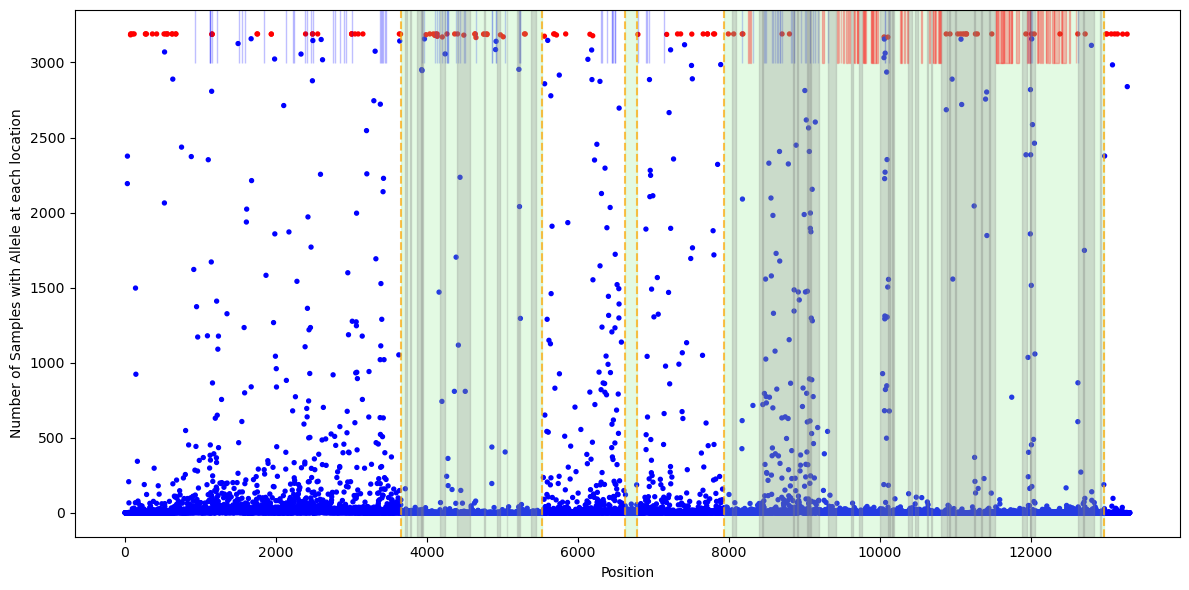

In [8]:
plt.figure(figsize=(12, 6))
ppdd=pd.DataFrame({'temp': colorl})
ppdd['color'] = np.where(ppdd['temp'] >=len(vcf_directories)*0.99, 'red', 'blue')
plt.scatter(ppdd.index,ppdd['temp'], s=8, c=ppdd['color'])
# plt.xlim(12040,12050)
for i, (start, end) in enumerate(pseud_pos):
    rRNA_region = plt.axvspan(start, end, 0.9, 1, alpha=0.25, color='blue')

for i, (start, end) in enumerate(rRNA_positions):

    plt.axvline(x=start, color='orange', linestyle='--', alpha=0.7)
    plt.axvline(x=end, color='orange', linestyle='--', alpha=0.7)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='lightgreen')
for i, (start, end) in enumerate(expansion_positions2):
    #print(row[1]['Start'])
#    plt.axvline(x=row[1]['Start'], color='grey', linestyle='--', alpha=0.1)
#    plt.axvline(x=row[1]['End'], color='grey', linestyle='--', alpha=0.1)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')
    
for i, (start, end) in enumerate(expansion_positions1):
#    plt.axvline(x=row[1]['Start'], color='grey', linestyle='--', alpha=0.1)
#    plt.axvline(x=row[1]['End'], color='grey', linestyle='--', alpha=0.1)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')

for i, (start, end) in enumerate(hmplr_pos):
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')

for i, (start, end) in enumerate(csvd_pos):
    rRNA_region = plt.axvspan(start, end, 0.9, 1, alpha=0.25, color='red')

# plt.xlim(12040,12050)
plt.xlabel('Position')
plt.ylabel('Number of Samples with Allele at each location')
# plt.title("Homopolymer&ExpansionSegment Removal")
# plt.title("Homopolymer Removal")
# plt.xlim(zoomed_range)
plt.tight_layout()

In [7]:
done={}
done2={}
# .drop_duplicates(subset='x', keep='first')
# sdata=[]
# other=[]

for file in vcf_directories:
    sdf= pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold, 'ref':rh, 'alt': ah})
    data=data.drop_duplicates(subset='x', keep='first')
    # data=data[data['y'] >= 0.90]

    for i, segment in data.iterrows():
        
        xtmp, tmp, aft = int(segment['x']), segment['alt'],  segment['y']
        if xtmp in done:
            done[xtmp].append(tmp)
            done2[xtmp].append(aft)
            
            # pass
        else:
            # Option 1: Initialize missing key with empty list
            done[xtmp] = []
            done2[xtmp] = []
            
            done[xtmp].append(tmp)
            done2[xtmp].append(aft)

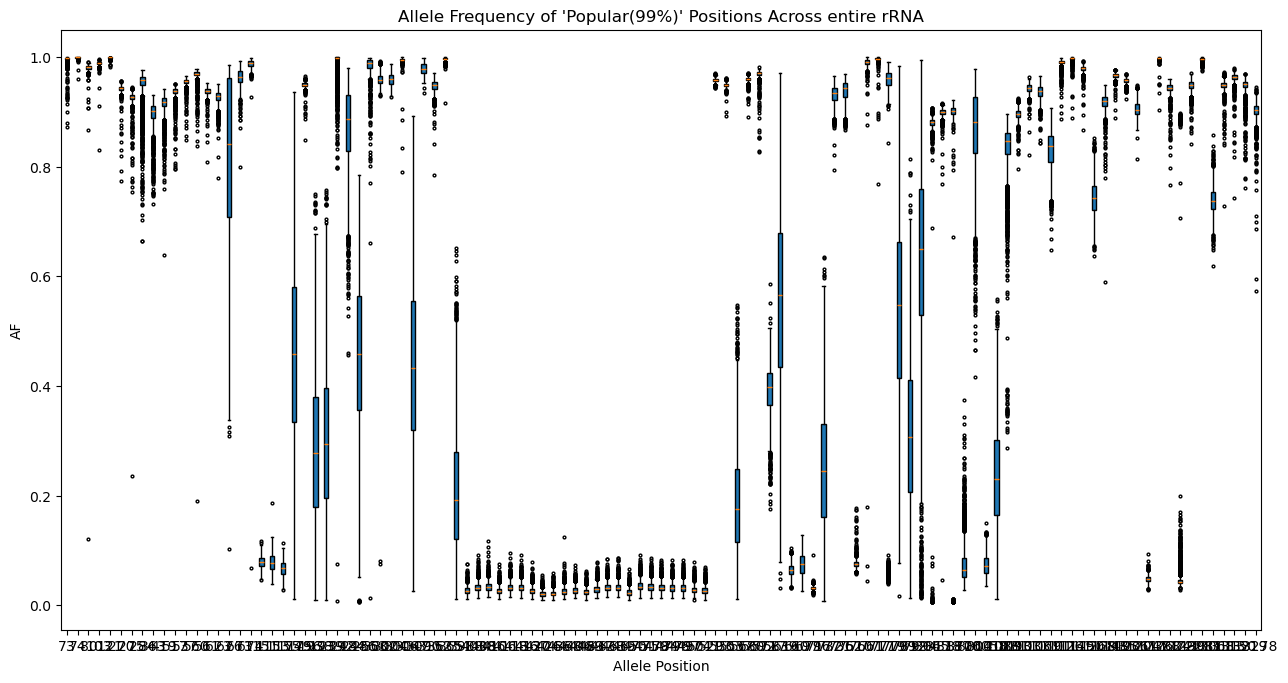

In [16]:
ppdd=pd.DataFrame({'temp': colorl})
ppdd['color'] = np.where(ppdd['temp'] >=len(vcf_directories)*0.99, 'red', 'blue')
d_rows = ppdd[ppdd['color'] == 'red']
index = d_rows.index.tolist()
name=[]
hold=[]
for item in index:
    # print(item)
    # i=i+1
    # if 3657 < item <5527:
    # if 6623 < item <6779:
    # if 7935 < item <12969:
    # if 3657 < item <5527 or 6623 < item <6779 or 7935 < item <12969:
    if 0 < item <13314:
        # print(item)
        hold.append(done2[item])
        name.append(item)
        # ax.boxplot(done2[item], positions=[i],labels=[item],widths=0.4)


flierprops = {'marker': 'o', 'markersize': 2}
# Define boxplot colors
# colors = ['lightgrey', 'lightgreen', 'lightgrey', 'lightgreen', 'lightgrey', 'lightgreen', 'lightgrey']  # Adjust color order as needed
coolrs=[]
for n in name:
    for _, segment in df1.iterrows():
            start, end = segment['Start'], segment['End']
            if start <= n <= end:
                coolrs.append('grey')
    for _, segment in df2.iterrows():
            start, end = segment['Start'], segment['End']
            if start <= n <= end:
                coolrs.append('grey')
    for _, segment in df4.iterrows():
            start, end = segment['Start'], segment['End']
            if start <= n <= end:
                print('n')
                coolrs.append('red')
                
        # Select rows where 'x' is within the segment range
        # selected_names = [item for item in name if start <= item <= end]



fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Add labels and title (optional)
bp = ax.boxplot(hold, vert=True, patch_artist=True,labels=name, flierprops=flierprops, widths=0.4)
# bp = ax.boxplot(hold, vert=True, patch_artist=True,labels=name, flierprops=flierprops, showmeans=True,meanline=True,widths=0.4)
#notch=True, vert=True,
# Color boxes and medians based on labels
# for box, median, label in zip(bp['boxes'], bp['medians'], coolrs):
#     box.set_facecolor(label)
    ## median.set_color(label)

# for line, i in zip(bp['medians'], coolrs):
#     # get position data for median line
#     x, y = line.get_xydata()[1] # top of median line
#     # overlay median value
#     plt.text(x, y, i,
#          horizontalalignment='center') # draw above, centered

plt.xlabel("Allele Position")
plt.ylabel("AF")
plt.title("Allele Frequency of 'Popular(99%)' Positions Across entire rRNA")

# Display the plot
plt.show()


In [ ]:
###################################### Section 2.3 end ######################################################################
###################################### Section 2.4 start ##################################################################
###################################### Allele shared between TWO Analysis ##########################################################

In [6]:
VSdic={}
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    ehd=[]
    for _, entry in data.iterrows():
        pos, var = entry['x'], entry['y']
        if pos in ehd:
            # print('yes')
            pass
        elif pos<3657 or (5527<pos<6623) or (6779<pos<7935):
            # print('yuh')
            pass
        else:
            ehd.append(pos)
            if pos in VSdic:
                VSdic[pos].append(var)
            else:
                VSdic[pos] =[var]
        

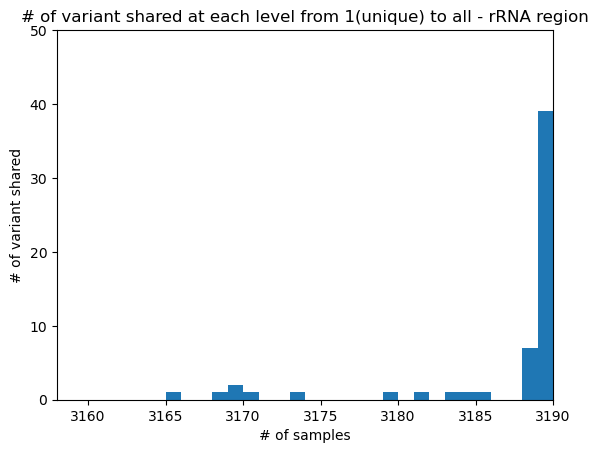

In [15]:
hist=[]
for key in VSdic:
    hist.append(len(VSdic[key]))
#### Plot the histogram with 10 bins (adjustable)
plt.hist(hist,bins=len(vcf_directories))

# Customize the plot (optional)
plt.xlabel("# of samples")
plt.ylabel("# of variant shared")
plt.title("# of variant shared at each level from 1(unique) to all - rRNA region")
plt.ylim(0,50)
plt.xlim(len(vcf_directories)-32,len(vcf_directories))
# Display the histogram
plt.show()

In [ ]:
twins={}
other=[]
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    # greyx=[]
    # greyy=[]
    for _, segment in df5.iterrows():
        start, end, cutf = segment['Start'], segment['End'],segment['Cutoff']
        
        # Select rows where 'x' is within the segment range
        # mask = (data['x'] >= start) & (data['x'] <= end) & (data['y'] >= cutf)
        mask = (data['x'] == start)
        selected_data = data[mask]
        if len(selected_data) >0:
            if start not in twins:
                twins[start]=[file]
            else:
                twins[start].append(file)
answr={}
for item in twins:
    index1 = df[df['Run'] == twins[item][0][-29:-19]].index[0]
    index2 = df[df['Run'] == twins[item][1][-29:-19]].index[0]
    # print(twins[item][0][-29:-19])

    etnc1=str(df['population'][index1])
    etnc2=str(df['population'][index2])
    # print(etnc1,etnc2)
    # print(etnc2[7:11])
    if etnc1 != etnc2:
        answr[item]=True
    else:
        answr[item]=False
la=0
for hah in answr:
    if answr[hah]==False:
        la=la+1
pie=np.array([la,len(answr)-la])
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
pie

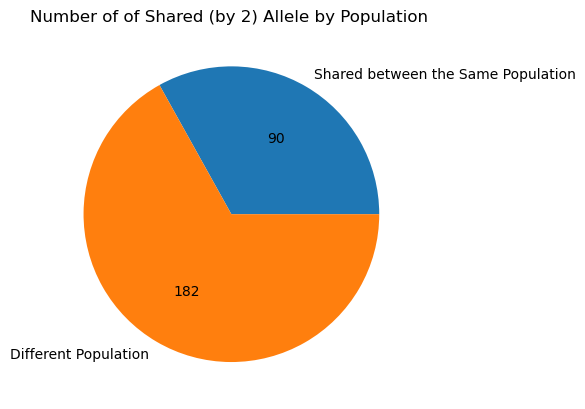

In [67]:
# Define the labels for each slice
# pievalue=[str(314), str(391)]
labels = ["Shared between the Same Population", "Different Population"]
# Create the pie chart
plt.pie(pie, labels=labels,autopct=autopct_format(pie))  # Add a percentage label to each slice, autopct="%1.1f%%"
# Add a title to the pie chart
plt.title("Number of of Shared (by 2) Allele by Population ")

# Show the pie chart
plt.show()

In [ ]:
#df5.to_csv('twinset.csv', index=False)

In [ ]:
###################################### Section 2.4 end ######################################################################
###################################### Section 3 start ##################################################################
###################################### extra functions/tests ##########################################################

#####Filter for replicates#####

In [31]:
hold=[]
right=[]
for file in vcf_directories:
    temp=file.split('/')
    # print(temp)
    if temp[-2] not in hold:
        hold.append(temp[-2])
        right.append(file)
print(len(right))
print(len(vcf_directories))

3188
3188


In [22]:
#this is the overview of 3202 samples, double check if sample is from our target cohort
lets_path = '/scratch/cgsb/hochwagen/Human_rDNA_project/1000Geno/para/1000data.csv'
df=pd.read_csv(lets_path)
# gth=df['Run'].tolist()

In [32]:
#####this make sure all the samples from 1000 Genome
right=[]
righth=[]
comp=[]
for item in gth:
    if item in hold:
        right.append(item)
    elif item not in hold:
        # print(item)
        comp.append(item)
print(len(hold))
print(len(right))
print(len(gth))
print(len(comp))

3188
3188
3202
14


In [19]:
######here are some code snipets for creating download sample.txt

3207


In [16]:
c1=0
c2=1
d1=[]
for files in comp:
    c1=c1+1
    if c1<7:
        d1.append(files)
    else:
        d1.append(files)
        with open('/scratch/cgsb/hochwagen/Human_rDNA_project/1000Geno/suplment/suplment2/suplment3/suplment4/sample_'+str(c2)+'.txt', 'w') as f:
            for line in d1:
                f.write(f"{line}\n")
        c2=c2+1
        d1=[]
        c1=0



In [ ]:
##########find particular regions

In [ ]:
#####here we are gonna try to plot how many(each many) people share how many variants

In [17]:
hold,xhold,rh,ah=read_txt2(vcf_directories[1])
data = pd.DataFrame({'x': xhold, 'y': hold})
data

,x,y
0,73,0.997305
1,74,0.999332
2,80,0.976086
3,103,0.980172
4,121,0.999056
...,...,...
297,13113,0.957721
298,13150,0.970023
299,13219,0.932316
300,13278,0.878601


In [85]:
5527-3657+6779-6623+12969-7935

7060

In [80]:
########################### now after population we have family

In [99]:
for item in twins:
    index1 = df[df['Run'] == twins[item][0][-29:-19]].index[0]
    index2 = df[df['Run'] == twins[item][1][-29:-19]].index[0]
    # print(twins[item][0][-29:-19])

    etnc1=str(df['Family_Id'][index1])
    etnc2=str(df['Family_Id'][index2])
    print(etnc1,etnc2)

nan 1423
nan nan
nan 11430
nan 11386
nan nan
nan nan
nan IBS036
nan BD47
nan PEL020,PEL020
nan nan
nan nan
nan M018,M018-03
nan M018,M018-03
nan nan
nan PK27
NG98 11410
nan 1350
IBS053 PEL37
PEL37 M033,M033-03
PEL37 nan
nan nan
SH064 nan
nan nan
nan nan
PK17 nan
nan nan
SH069 nan
nan NG93
CLM38 SL11
nan nan
BD44 nan
SL45 nan
nan nan
PR11 IT029
nan ST115
PK24 nan
11373 nan
nan 1458
nan ST026
nan 2427,2427-03
nan nan
nan SH019
BB28 nan
11275 11377
nan NG108
1418 nan
BB05 nan
2494,2494-02 VN017
nan nan
11376 11437
nan nan
nan SH068
M010,M010-03 M027,M027-03
nan nan
nan 11453
nan nan
nan SL47
nan SH073
nan IBS021
nan PEL53,PEL053
11443 nan
VN62,VN062 1375
nan 2405,2405-02
nan VN040
BD26 VN033
BD26 ST232
nan Y013
nan nan
nan M014,M014-03
nan M014,M014-02
nan IT184
nan ST142
nan pk42,PK42
nan pk42,PK42
GB97 SL02
GB97 PR39
nan nan
nan VN078,VN78
IT047 PK22
BB49 nan
2357 2357,2357-01
BD31 nan
BD31 nan
PEL011,PEL011 11450
nan nan
nan 1346
nan pk40,PK40
nan pk40,PK40
nan pk40,PK40
PK36 11401
PK3

In [100]:
# answr={}
answr2={}
### 0 is match , 1 is not, 5 is none
for item in twins:
    index1 = df[df['Run'] == twins[item][0][-29:-19]].index[0]
    index2 = df[df['Run'] == twins[item][1][-29:-19]].index[0]
    # print(twins[item][0][-29:-19])

    etnc1=str(df['Family_Id'][index1])
    etnc2=str(df['Family_Id'][index2])
    # print(etnc1,etnc2)
    split_etnc1 = etnc1.split(",")
    split_etnc2 = etnc2.split(",")
    # print(split_etnc1,split_etnc2)
    
    for ele in split_etnc1:
        if ele == 'nan':
            answr2[item]=5

        elif ele in split_etnc2:
            answr2[item]=0
            pass
        elif ele not in split_etnc2:
            answr2[item]=1
        
    # print(etnc2[7:11])
    # if etnc1 != etnc2:
    #     answr[item]=True
    # else:
    #     answr[item]=False

In [101]:
### 0 is match , 1 is not, 5 is none
la=[0,0,0]
for hah in answr2:
    if answr2[hah]==0:
        la[0]=la[0]+1
    elif answr2[hah]==1:
        la[1]=la[1]+1
    elif answr2[hah]==5:
        la[2]=la[2]+1
pie=np.array(la)

In [102]:
la

[3, 361, 341]

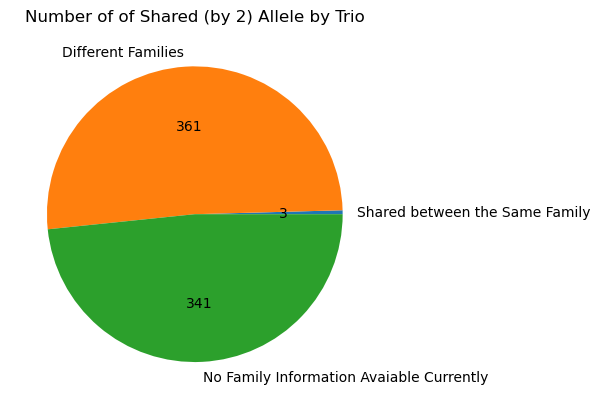

In [107]:
# Define the labels for each slice
# pievalue=[str(314), str(391)]
labels = ["Shared between the Same Family", "Different Families","No Family Information Avaiable Currently"]
# Create the pie chart
plt.pie(pie, labels=labels,autopct=autopct_format(pie) )  # Add a percentage label to each slice, autopct="%1.1f%%"------autopct=autopct_format(pie)
# Add a title to the pie chart
plt.title("Number of of Shared (by 2) Allele by Trio")

# Show the pie chart
plt.show()

In [ ]:
##########################find targets

In [ ]:
data = np.array([
    ['TargetRegion1'],
    [12620],
    [12630],
    [0.6]
])
df5 = pd.DataFrame(data.T, columns=['Segment', 'Start', 'End','Cutoff'])
df5['Start'] = pd.to_numeric(df5['Start'])
df5['End'] = pd.to_numeric(df5['End'])
df5['Cutoff'] = pd.to_numeric(df5['Cutoff'])
print(df5)

In [7]:
expansion_positions1=[]
for row in df1.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    expansion_positions1.append(hold)
print(expansion_positions1)
expansion_positions2=[]
for row in df2.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    expansion_positions2.append(hold)
print(expansion_positions2)
hmplr_pos=[]
for row in df3.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    hmplr_pos.append(hold)
print(hmplr_pos)
csvd_pos=[]
for row in df4.iterrows():
    hold=[]
    hold.append(row[1]['Start'])
    hold.append(row[1]['End'])
    csvd_pos.append(hold)
print(csvd_pos)


[[8049, 8091], [8400, 9200], [9319, 9422], [9617, 9646], [9728, 9764], [10010, 10191], [10374, 10429], [10473, 10510], [10620, 10640], [10686, 10699], [10810, 11521], [11890, 11948], [11992, 12059], [12633, 12840], [12918, 12931]]
[[3710, 3730], [3773, 3787], [3865, 3948], [4169, 4240], [4394, 4568], [4754, 4771], [4929, 4962], [5055, 5060], [5190, 5208], [5220, 5238], [5383, 5446]]
[[8439, 8451], [8903, 8914], [9042, 9053], [10110, 10130], [10161, 10172], [10892, 10895], [10920, 10931], [11001, 11013], [11244, 11262], [11344, 11355], [11445, 11456], [12697, 12712], [3920, 3931], [8853, 8864], [9058, 9069], [9081, 9093], [11997, 12008]]
[[8256, 8267], [8284, 8292], [9234, 9256], [9439, 9445], [9454, 9461], [9483, 9491], [9511, 9525], [9547, 9584], [9589, 9607], [9654, 9661], [9663, 9671], [9698, 9715], [9698, 9715], [9772, 9779], [9784, 9792], [9795, 9801], [9810, 9815], [9882, 9888], [9890, 9897], [9899, 9909], [9912, 9948], [9952, 9975], [10266, 10277], [10278, 10295], [10327, 10334]

In [10]:
#### 

fname=[]
# sdata=[]
other=[]
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    # greyx=[]
    # greyy=[]
    for _, segment in df5.iterrows():
        start, end, cutf = segment['Start'], segment['End'],segment['Cutoff']
        
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end) & (data['y'] >= cutf)
        selected_data = data[mask]
        if len(selected_data) >0:
            fname.append(file)
            # sdata.append(selected_data)
        else:
            other.append(file)
            print(file)      


/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/data/1GP/ERR3989289/ERR3989

KeyboardInterrupt: 

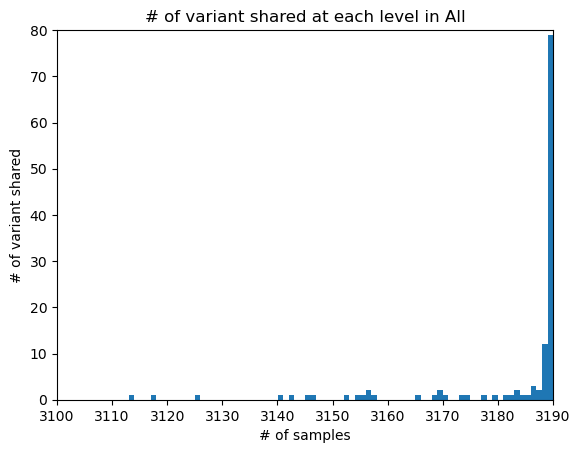

In [45]:
#### Plot the histogram with 10 bins (adjustable)
plt.hist(hist,bins=3190)
# plt.hist(hist)
# Customize the plot (optional)
plt.xlabel("# of samples")
plt.ylabel("# of variant shared")
plt.title("# of variant shared at each level in All")
# # plt.ylim(0,1200)
# plt.xlim(1,11)
plt.ylim(0,80)
plt.xlim(3100,3190)
# Display the histogram
plt.show()

In [32]:
####these are the ones with more than 1 type of allele, we gonna target them later
VSdic={}
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    data = data.drop_duplicates(subset='x', keep='first')
    for _, entry in data.iterrows():
        pos, var = entry['x'], entry['y']
        if pos<3657 or (5527<pos<6623) or (6779<pos<7935):
            # print('yuh')
            pass
        else:
            if pos in VSdic:
                VSdic[pos].append(var)
            else:
                VSdic[pos] =[var]
        

In [ ]:
####all
VSdic={}
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    data = data.drop_duplicates(subset='x', keep='first')
    for _, entry in data.iterrows():
        pos, var = entry['x'], entry['y']
        if pos in VSdic:
            VSdic[pos].append(var)
        else:
            VSdic[pos] =[var]

        # if (pos in df6['Start']) or (pos in df2['Start'] :
        #     pass
        # else:
            # if pos in VSdic:
            #     VSdic[pos].append(var)
            # else:
            #     VSdic[pos] =[var]
        

In [58]:
####all
VSdic={}
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    data = data.drop_duplicates(subset='x', keep='first')
    for _, entry in data.iterrows():
        pos, var = entry['x'], entry['y']
        if pos in df4['Start'] :
            if pos in VSdic:
                VSdic[pos].append(var)
            else:
                VSdic[pos] =[var]
        else:
            pass
        

In [6]:
####psedo
VSdic={}
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    data = data.drop_duplicates(subset='x', keep='first')
    for _, entry in data.iterrows():
        pos, var = entry['x'], entry['y']
        for _, segment in df1.iterrows():
            start, end = segment['Start'], segment['End']
            if start<pos<end:
                if pos in VSdic:
                    VSdic[pos].append(var)
                else:
                    VSdic[pos] =[var]
            else:
                pass
        for _, segment in df2.iterrows():
            start, end = segment['Start'], segment['End']
            if start<pos<end:
                if pos in VSdic:
                    VSdic[pos].append(var)
                else:
                    VSdic[pos] =[var]
            else:
                pass




In [ ]:
#####################

In [32]:
data = np.array([
    ['TargetRegion1'],
    [12620],
    [12630],
    [0.6]
])
df5 = pd.DataFrame(data.T, columns=['Segment', 'Start', 'End','Cutoff'])
df5['Start'] = pd.to_numeric(df5['Start'])
df5['End'] = pd.to_numeric(df5['End'])
df5['Cutoff'] = pd.to_numeric(df5['Cutoff'])
print(df5)

         Segment  Start    End  Cutoff
0  TargetRegion1  12620  12630     0.6


In [43]:
#### 

fname=[]
# sdata=[]
other=[]
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    # greyx=[]
    # greyy=[]
    for _, segment in df5.iterrows():
        start, end, cutf = segment['Start'], segment['End'],segment['Cutoff']
        
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end) & (data['y'] >= cutf)
        selected_data = data[mask]
        if len(selected_data) >0:
            fname.append(file)
            # sdata.append(selected_data)
        else:
            other.append(file)
            print(file)      

print(len(fname))

/scratch/cgsb/hochwagen/Human_rDNA_project/test_run_scrape/array_jobs_old/ERR3240137/ERR3240137_rDNA.vcf_temp7.txt
/scratch/cgsb/hochwagen/Human_rDNA_project/UTW/U1329b/ERR3989280/ERR3989280_rDNA.vcf_temp7.txt
1977


In [ ]:
########find targeted allele at 28s

In [33]:
data = np.array([
    ['TargetRegion1'],
    [3657],
    [5527],
    [0.98]
])
df5 = pd.DataFrame(data.T, columns=['Segment', 'Start', 'End','Cutoff'])
df5['Start'] = pd.to_numeric(df5['Start'])
df5['End'] = pd.to_numeric(df5['End'])
df5['Cutoff'] = pd.to_numeric(df5['Cutoff'])
print(df5)

         Segment  Start   End  Cutoff
0  TargetRegion1   3657  5527    0.98


In [13]:
fname=[]
sdata=[]
other=[]
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold})
    # greyx=[]
    # greyy=[]
    for _, segment in df5.iterrows():
        start, end, cutf = segment['Start'], segment['End'],segment['Cutoff']
        
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end) & (data['y'] >= cutf)
        selected_data = data[mask]
        if len(selected_data) >0:
            fname.append(file)
            sdata.append(selected_data)
        else:
            other.append(file)
        # print(selected_data)
        # Append selected x and y to greyx and greyy
        # greyx.extend(selected_data['x'].tolist())
        # greyy.extend(selected_data['y'].tolist())
        
        # Remove the selected rows from data
        # data = data[~mask]
print(len(fname))
print(len(other))

2
1975


In [27]:
fname

['/scratch/cgsb/hochwagen/Human_rDNA_project/test_run_scrape/array_jobs_old/ERR3240137/ERR3240137_rDNA.vcf_temp7.txt',
 '/scratch/cgsb/hochwagen/Human_rDNA_project/UTW/U1329b/ERR3989280/ERR3989280_rDNA.vcf_temp7.txt']

In [ ]:
###find alt and ref for target region

In [84]:
data = np.array([
    ['TargetRegion1'],
    [12620],
    [12630],
    [0.6]
])
df5 = pd.DataFrame(data.T, columns=['Segment', 'Start', 'End','Cutoff'])
df5['Start'] = pd.to_numeric(df5['Start'])
df5['End'] = pd.to_numeric(df5['End'])
df5['Cutoff'] = pd.to_numeric(df5['Cutoff'])
print(df5)

         Segment  Start    End  Cutoff
0  TargetRegion1  12620  12630     0.6


In [35]:
fname=[]
sdata=[]
sdf= pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
other=[]
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold, 'ref':rh, 'alt': ah})
    # greyx=[]
    # greyy=[]
    for _, segment in df5.iterrows():
        start, end, cutf = segment['Start'], segment['End'],segment['Cutoff']
        
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end) & (data['y'] >= cutf)
        selected_data = data[mask]
        if len(selected_data) >0:
            fname.append(file)
            # sdata.append(selected_data)
            sdf=pd.concat([sdf,selected_data],ignore_index=True)
        else:
            other.append(file)
            print(file)      
print(len(fname))

/state/partition1/job-48027281/ipykernel_953942/3930477233.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sdf=pd.concat([sdf,selected_data],ignore_index=True)


2952


In [48]:
#####find positions where all samples(90%) has variant

In [53]:
colorl=[0]*13314
for file in vcf_directories:
    hold,xhold,rh,ah=read_txt2(file)

    # Convert xhold and hold to DataFrame for easier manipulation
    data = pd.DataFrame({'x': xhold, 'y': hold})
    
    # Loop through each segment in df1(28S)
    done=[]
    for _, segment in data.iterrows():
        xhold, hold = int(segment['x']), segment['y']
        ####here we can threshold on y for future
        if xhold not in done:
            done.append(xhold)
            colorl[xhold]=colorl[xhold]+1


### rRNA_positions

In [73]:
colorl=[0]*15000
hold,xhold,rh,ah=read_txt2(vcf_directories[1])

In [112]:
path='/scratch/cgsb/hochwagen/Human_rDNA_project/UtahWhite/trio4/ERR3989289/ERR3989289_rDNA.vcf_temp7.txt'
df = pd.read_csv(path, header=None)
df=df.iloc[175:194]
lst=df[0].str.split('\t')
lst

175    [Human, 11968, ., A, C, 77, PASS, 4179, 0.0256...
176    [Human, 11987, ., T, G, 81, PASS, 4103, 0.0253...
177    [Human, 12011, ., G, GC, 49314, PASS, 3995, 0....
178    [Human, 12014, ., C, CG, 209, PASS, 3996, 0.01...
179    [Human, 12024, ., T, G, 74, PASS, 3965, 0.0322...
180    [Human, 12047, ., C, CG, 166, PASS, 4065, 0.03...
181    [Human, 12047, ., C, CGCG, 918, PASS, 4065, 0....
182    [Human, 12047, ., C, G, 5063, PASS, 4088, 0.85...
183    [Human, 12050, ., G, GCGC, 223, PASS, 4013, 0....
184    [Human, 12119, ., C, T, 253, PASS, 4340, 0.015...
185    [Human, 12388, ., G, A, 49314, PASS, 4431, 0.9...
186    [Human, 12624, ., C, CG, 49314, PASS, 4739, 0....
187    [Human, 12712, ., A, G, 1483, PASS, 3828, 0.10...
188    [Human, 12722, ., C, CG, 607, PASS, 3775, 0.03...
189    [Human, 12722, ., C, CGCG, 49314, PASS, 3775, ...
190    [Human, 12805, ., C, T, 406, PASS, 3953, 0.031...
191    [Human, 12809, ., A, C, 74, PASS, 4008, 0.0281...
192    [Human, 12998, ., C, CG,

In [17]:
fname=[]
sdata=[]
sdict={}
other=[]
colorl=[0]*13314
for file in vcf_directories:
    sdf= pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold, 'ref':rh, 'alt': ah})
    # data=data[data['y'] >= 0.90]
    done=[]
    for i, segment in data.iterrows():
        xtmp, tmp = int(segment['x']), segment['y']
        if xtmp not in done:
            done.append(xtmp)
            colorl[xtmp]=colorl[xtmp]+1


In [ ]:
plt.figure(figsize=(12, 6))
ppdd=pd.DataFrame({'temp': colorl})
ppdd['color'] = np.where(ppdd['temp'] >= len(vcf_directories)*0.99, 'red', 'blue')
scatter=plt.scatter(ppdd.index,ppdd['temp'], s=8, c=ppdd['color'])
for i, (start, end) in enumerate(rRNA_positions):

    plt.axvline(x=start, color='orange', linestyle='--', alpha=0.7)
    plt.axvline(x=end, color='orange', linestyle='--', alpha=0.7)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='lightgreen')
for i, (start, end) in enumerate(expansion_positions2):
    #print(row[1]['Start'])
#    plt.axvline(x=row[1]['Start'], color='grey', linestyle='--', alpha=0.1)
#    plt.axvline(x=row[1]['End'], color='grey', linestyle='--', alpha=0.1)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')
    
for i, (start, end) in enumerate(expansion_positions1):
#    plt.axvline(x=row[1]['Start'], color='grey', linestyle='--', alpha=0.1)
#    plt.axvline(x=row[1]['End'], color='grey', linestyle='--', alpha=0.1)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')

for i, (start, end) in enumerate(hmplr_pos):
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')

for i, (start, end) in enumerate(csvd_pos):
    rRNA_region = plt.axvspan(start, end, 0.9, 1, alpha=0.25, color='red')

# plt.xlim(12040,12050)
# plt.legend(handles=[scatter], labels=['less than 100% population shared', '100%']) 
unique_colors = ppdd['color'].unique()
legend_labels = unique_colors.tolist()
legend_handles = [plt.scatter([], [], s=8, c=color) for color in unique_colors]
# Add the legend to the plot
plt.legend(legend_handles, legend_labels, title='Over 99% of Population')

# plt.legend(unique_colors, loc="upper left")
plt.xlabel('Position')
plt.ylabel('Number of Samples')
# plt.title("Homopolymer&ExpansionSegment Removal")
plt.title("At each Position on the rRNA # of Samples that has Allele ")
# plt.xlim(zoomed_range)
plt.tight_layout()

In [ ]:
#########AF by dots

In [5]:
colorl=[0]*13314

for file in vcf_directories:
    sdf= pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold, 'ref':rh, 'alt': ah})
    thispl=[]
    
    for i, segment in data.iterrows():
        xtmp, tmp = int(segment['x']), segment['y']

        if xtmp not in thispl:
            thispl.append(xtmp)
        # elif xtmp in thispl:
        #     colorl[xtmp]=colorl[xtmp]+1
        #     pass
    for item in thispl:
        colorl[item]=colorl[item]+1
        # colorl[xtmp]=colorl[xtmp]+1
            # done.append(xtmp)
            # colorl[xtmp]=colorl[xtmp]+1

In [25]:
done={}
done2={}

for file in vcf_directories:
    sdf= pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold, 'ref':rh, 'alt': ah})
    # data=data[data['y'] >= 0.90]
    for i, segment in data.iterrows():

        xtmp, tmp, aft = int(segment['x']), segment['alt'],  segment['y']
        if xtmp in done:
            done[xtmp].append(tmp)

            done2[xtmp].append(aft)
    
            # pass
        else:

            # Option 1: Initialize missing key with empty list
            done[xtmp] = []
            done2[xtmp] = []

            done[xtmp].append(tmp)
            done2[xtmp].append(aft)

            

       


In [ ]:
plt.figure(figsize=(12, 6))
ppdd=pd.DataFrame({'temp': colorl})
ppdd['color'] = np.where(ppdd['temp'] >=len(vcf_directories)*0.99, 'red', 'blue')
plt.scatter(ppdd.index,ppdd['temp'], s=8, c=ppdd['color'])
# plt.xlim(12040,12050)
for i, (start, end) in enumerate(rRNA_positions):

    plt.axvline(x=start, color='orange', linestyle='--', alpha=0.7)
    plt.axvline(x=end, color='orange', linestyle='--', alpha=0.7)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='lightgreen')
for i, (start, end) in enumerate(expansion_positions2):
    #print(row[1]['Start'])
#    plt.axvline(x=row[1]['Start'], color='grey', linestyle='--', alpha=0.1)
#    plt.axvline(x=row[1]['End'], color='grey', linestyle='--', alpha=0.1)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')
    
for i, (start, end) in enumerate(expansion_positions1):
#    plt.axvline(x=row[1]['Start'], color='grey', linestyle='--', alpha=0.1)
#    plt.axvline(x=row[1]['End'], color='grey', linestyle='--', alpha=0.1)
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')

for i, (start, end) in enumerate(hmplr_pos):
    rRNA_region = plt.axvspan(start, end, alpha=0.25, color='grey')

for i, (start, end) in enumerate(csvd_pos):
    rRNA_region = plt.axvspan(start, end, 0.9, 1, alpha=0.25, color='red')

# plt.xlim(12040,12050)
plt.xlabel('Position')
plt.ylabel('Number of Samples with Allele at each location')
# plt.title("Homopolymer&ExpansionSegment Removal")
# plt.title("Homopolymer Removal")
plt.xlim(zoomed_range)
plt.tight_layout()

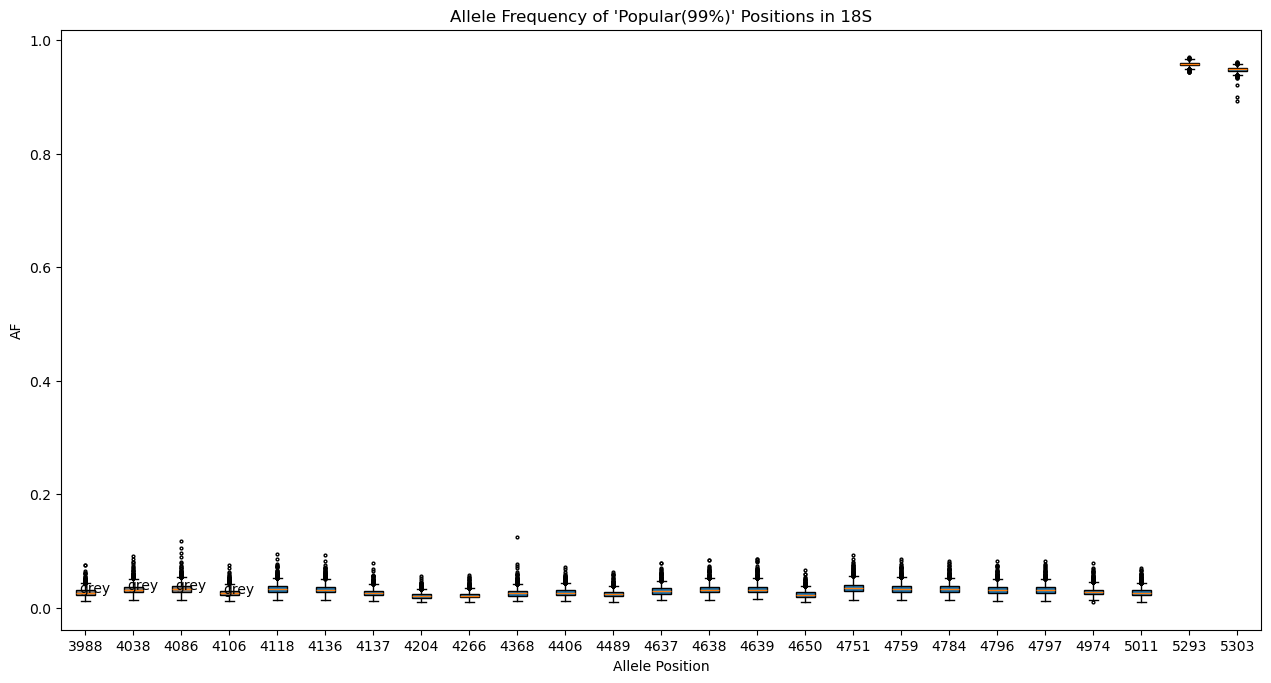

In [78]:
ppdd=pd.DataFrame({'temp': colorl})
ppdd['color'] = np.where(ppdd['temp'] >=len(vcf_directories)*0.99, 'red', 'blue')
d_rows = ppdd[ppdd['color'] == 'red']
index = d_rows.index.tolist()
name=[]
hold=[]
for item in index:
    # print(item)
    # i=i+1
    if 3657 < item <5527:
    # if 6623 < item <6779:
    # if 7935 < item <12969:
    # if 3657 < item <5527 or 6623 < item <6779 or 7935 < item <12969::
        # print(item)
        hold.append(done2[item])
        name.append(item)
        # ax.boxplot(done2[item], positions=[i],labels=[item],widths=0.4)


flierprops = {'marker': 'o', 'markersize': 2}
# Define boxplot colors
# colors = ['lightgrey', 'lightgreen', 'lightgrey', 'lightgreen', 'lightgrey', 'lightgreen', 'lightgrey']  # Adjust color order as needed
coolrs=[]
for n in name:
    for _, segment in df1.iterrows():
            start, end = segment['Start'], segment['End']
            if start <= n <= end:
                coolrs.append('grey')
    for _, segment in df2.iterrows():
            start, end = segment['Start'], segment['End']
            if start <= n <= end:
                coolrs.append('grey')
    for _, segment in df4.iterrows():
            start, end = segment['Start'], segment['End']
            if start <= n <= end:
                print('n')
                coolrs.append('red')
                
        # Select rows where 'x' is within the segment range
        # selected_names = [item for item in name if start <= item <= end]



fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Add labels and title (optional)
bp = ax.boxplot(hold, vert=True, patch_artist=True,labels=name, flierprops=flierprops, widths=0.4)
# bp = ax.boxplot(hold, vert=True, patch_artist=True,labels=name, flierprops=flierprops, showmeans=True,meanline=True,widths=0.4)
#notch=True, vert=True,
# Color boxes and medians based on labels
for box, median, label in zip(bp['boxes'], bp['medians'], coolrs):
    box.set_facecolor(label)
    ## median.set_color(label)

for line, i in zip(bp['medians'], coolrs):
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, i,
         horizontalalignment='center') # draw above, centered
# for line in bp['medians']:
#     # get position data for median line
#     x, y = line.get_xydata()[1] # top of median line
#     # overlay median value
#     plt.text(x, y, '%.3f' % y,
#          horizontalalignment='center') # draw above, centered

plt.xlabel("Allele Position")
plt.ylabel("AF")
plt.title("Allele Frequency of 'Popular(99%)' Positions in 18S")

# Display the plot
plt.show()


In [5]:
#pseduogenes
data = np.array([
    ['PG1', 'PG2', 'PG3', 'PG4', 'PG5', 'PG6', 'PG7', 'PG8', 'PG9', 'PG10', 'PG11', 'PG12', 'PG13', 'PG14', 'PG15','PG16','PG17','PG18','PG19'],
    # [114, 465, 1384, 1682, 1793, 2075, 2439, 2538, 2685, 2751, 2875, 3955, 4057, 4698, 4983],
    [4118, 4136, 4137, 4204, 4266, 4368, 4406, 4489, 4637, 4638, 4639, 4650, 4751, 4759, 4784, 4796, 4797, 4974, 5011],
    [4118, 4136, 4137, 4204, 4266, 4368, 4406, 4489, 4637, 4638, 4639, 4650, 4751, 4759, 4784, 4796, 4797, 4974, 5011]
])

df5 = pd.DataFrame(data.T, columns=['Segment', 'Start','End'])
df5['Start'] = pd.to_numeric(df5['Start'])
df5['End'] = pd.to_numeric(df5['End'])

In [ ]:
psedo={}
for _, segment in df5.iterrows():
    start, end = segment['Start'], segment['End']
    print(start)
    fname=[]
    sdata=[]
    sdf= pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
    # other=[]
    empty_df = pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
    psedo[start]=empty_df
    for file in vcf_directories:
        hold,xhold,rh,ah=read_txt2(file)
        data = pd.DataFrame({'x': xhold, 'y': hold, 'ref':rh, 'alt': ah})
        # Select rows where 'x' is within the segment range
        mask = (data['x'] >= start) & (data['x'] <= end)
        selected_data = data[mask]
        if len(selected_data) >0:
            fname.append(file)
            # sdata.append(selected_data)
            sdf=pd.concat([sdf,selected_data],ignore_index=True)
    psedo[start]=sdf
    print(len(fname))


In [23]:
print("list of positions in the rRNA has low AF(<25%) but across majority(99%) of the population")
print('Position',' #of_Samples', '      ref', '             Alt', '           Original Sequence')
i=-1
for key in psedo:
    i=i+1
    print(key, len(psedo[key]),psedo[key]['ref'].unique(),psedo[key]['alt'].unique(),hold[i],sep='           ')

list of positions in the rRNA has low AF(<25%) but across majority(99%) of the population
Position  #of_Samples       ref              Alt            Original Sequence
4118           3190           ['C']           ['T']           ggagcctgagaaacggctaccacatccaaggaaggcagcaggcgcgcaaat
4136           3191           ['G']           ['A' 'T']           accacatccaaggaaggcagcaggcgcgcaaattacccactcccgacccgg
4137           3174           ['C']           ['T']           ccacatccaaggaaggcagcaggcgcgcaaattacccactcccgacccggg
4204           3170           ['C']           ['T']           ataacaatacaggactctttcgaggccctgtaattggaatgagtccacttt
4266           3190           ['G']           ['A']           cgaggatccattggagggcaagtctggtgccagcagccgcggtaattccag
4368           3190           ['G']           ['A']           cttgggagcgggcgggcggtccgccgcgaggcgagccaccgcccgtccccg
4406           3190           ['C']           ['T']           ccgcccgtccccgccccttgcctctcggcgccccctcgatgctcttagctg
4489           3182           

In [86]:
sdf

,x,y,ref,alt
0,12624,0.951467,C,CG
1,12624,0.894224,C,CG
2,12624,0.936583,C,CG
3,12625,0.008415,G,GT
4,12624,0.932928,C,CG
...,...,...,...,...
4735,12626,0.023796,A,G
4736,12624,0.947356,C,CG
4737,12624,0.953173,C,CG
4738,12624,0.944693,C,CG


In [ ]:
##### find positions where all variants same nucletide

In [5]:
done={}
done2={}
# .drop_duplicates(subset='x', keep='first')
# sdata=[]
other=[]
colorl=[0]*13314
for file in vcf_directories:
    sdf= pd.DataFrame(columns=['x', 'y', 'ref', 'alt'])
    hold,xhold,rh,ah=read_txt2(file)
    data = pd.DataFrame({'x': xhold, 'y': hold, 'ref':rh, 'alt': ah})
    # data=data[data['y'] >= 0.90]

    for i, segment in data.iterrows():
        
        xtmp, tmp, aft = int(segment['x']), segment['alt'],  segment['y']
        if xtmp in done:
            done[xtmp].append(tmp)
            done2[xtmp].append(aft)
            
            # pass
        else:
            # Option 1: Initialize missing key with empty list
            done[xtmp] = []
            done2[xtmp] = []
            
            done[xtmp].append(tmp)
            done2[xtmp].append(aft)
            
    # if len(set(done[xtmp]))==2:
    #         colorl[xtmp]=colorl[xtmp]+1
        
        

In [10]:
len(colorl)

13314

In [13]:
colorl=[0]*13314
many=3000
print("list of positions in the rRNA has low AF(<25%) but across majority(93%) of the population")
print('Position',' #of_Samples', ' Alt', '        Average_AF')
for i in range(0,13314):
    # print(i)
    if i in done2: 
        colorl[i]=len(done2[i])/len(set(done[i]))
        avg=sum(done2[i])/len(done2[i])/len(set(done[i]))
        print(i,len(done2[i]),set(done[i]),avg, sep="       ")


list of positions in the rRNA has low AF(<25%) but across majority(93%) of the population
Position  #of_Samples  Alt         Average_AF
31       2193       {'C'}       0.9992676607387154
32       2376       {'T'}       0.9964741700336687
38       1       {'A'}       0.221014
48       2       {'G'}       0.17694
49       207       {'T'}       0.1975401449275361
51       1       {'A'}       0.307617
52       66       {'G'}       0.19276390909090912
53       1       {'C'}       0.148898
56       1       {'A'}       0.224786
58       2       {'A'}       0.192388
59       2       {'T'}       0.235193
68       2       {'C'}       0.2089695
73       3184       {'A'}       0.9967664635678366
74       3189       {'C'}       0.9988883916588283
77       2       {'A'}       0.12776749999999998
80       3191       {'AG', 'AC'}       0.4901077116891245
82       1       {'CT'}       0.103253
85       1       {'G'}       0.12524
89       1       {'G'}       0.143367
94       3       {'T'}       0.1557

In [32]:
sum(done2[73])/len(done2[73])

0.9967502382044553

In [23]:
rRNA_positions

[[3657, 5527], [6623, 6779], [7935, 12969]]

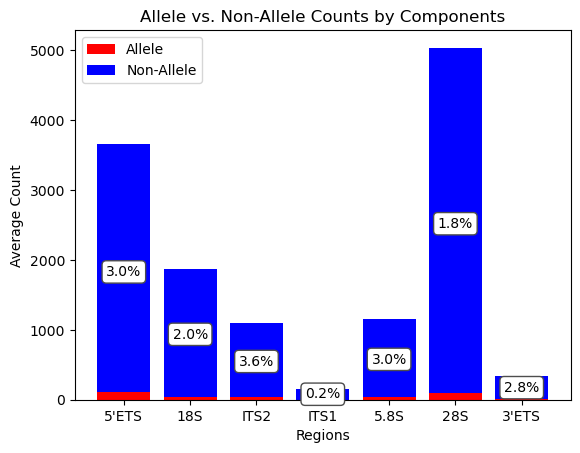

In [50]:
# plot bars in stack manner
# Create the bar plot with stacked bars
plt.bar(leg, y1, color='r', label='Allele')
plt.bar(leg, y2, bottom=y1, color='b', label='Non-Allele')
# Use the sorted data for your scatter plot
# plt.scatter(leg, sorty1, color='r', label='Allele', marker='o')


# # Add value labels using a loop for better control and customization
for i, (value1, value2) in enumerate(zip(y1, y2)):
    if i==0 or 6:
        pass

    total_value = value1 + value2

    x_pos = leg[i]  # Center the label on the bar
    y_pos = (value1 + value2) / 2  # Place the label at the middle height

    pre=value1/total_value*100
    # Customize label format (optional)
    label_text = f"{pre:.1f}%"  # Format to one decimal place

    # Add the label with alignment and optional offset
    plt.text(x_pos, y_pos, label_text, ha='center', va='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

# Add legend and display the plot
plt.legend()
plt.xlabel('Regions')
plt.ylabel('Average Count')
plt.title('Allele vs. Non-Allele Counts by Components')
plt.show()